1. Загрузить данные Market_Basket_Optimisation.csv.

In [1]:
import pandas as pd
data = pd.read_csv("Market_Basket_Optimisation.csv")
data

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Визуализировать данные (отразить на гистограммах относительную и 
фактическую  частоту  встречаемости  для  20  наиболее  популярных 
товаров).

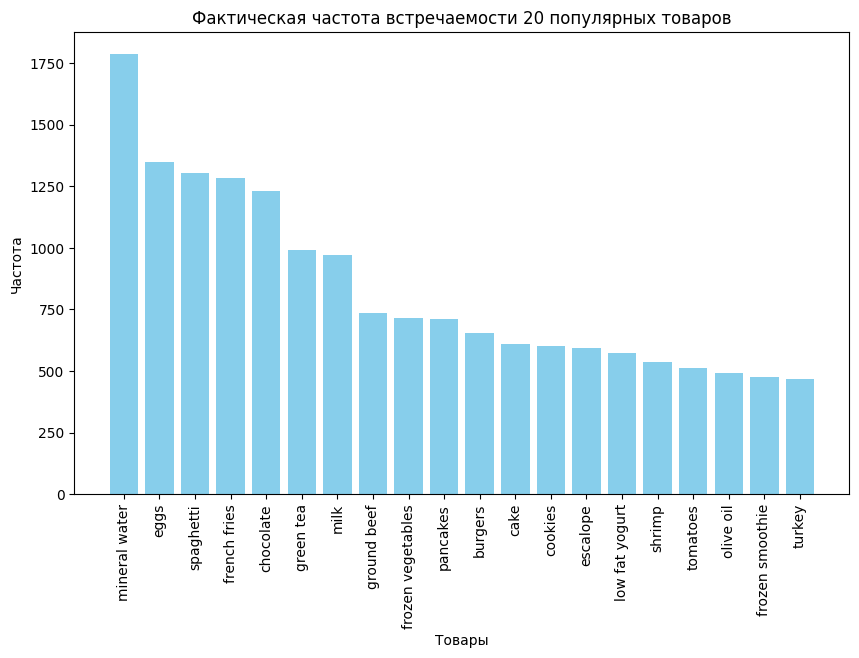

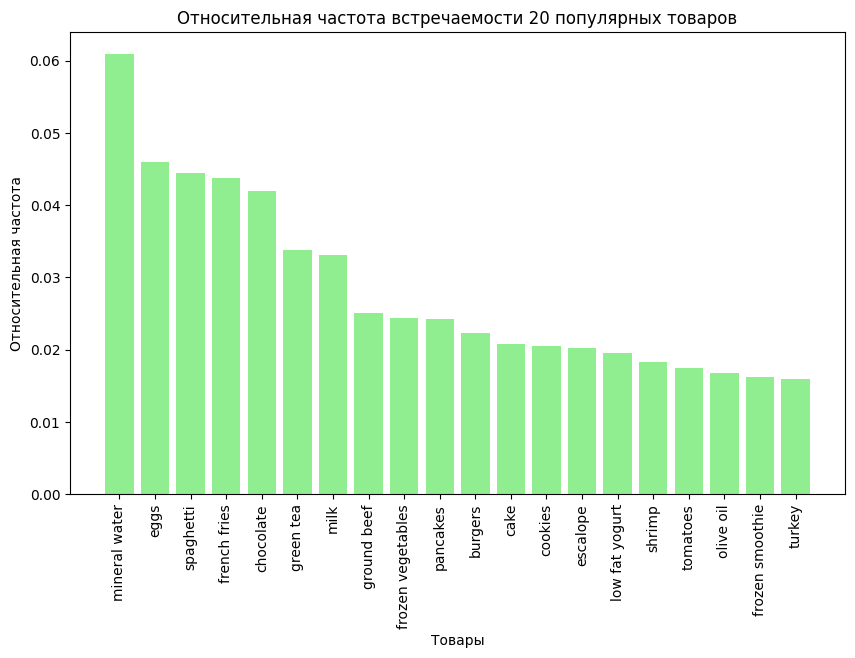

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

transactions = data.values.tolist()
all_items = [item for sublist in transactions for item in sublist if pd.notna(item)]

item_counts = Counter(all_items)

top_items = item_counts.most_common(20)

items, counts = zip(*top_items)

# Фактическая частота
plt.figure(figsize=(10, 6))
plt.bar(items, counts, color='skyblue')
plt.xticks(rotation=90)
plt.title('Фактическая частота встречаемости 20 популярных товаров')
plt.xlabel('Товары')
plt.ylabel('Частота')
plt.show()

# Относительная частота
relative_counts = [count / len(all_items) for count in counts]

plt.figure(figsize=(10, 6))
plt.bar(items, relative_counts, color='lightgreen')
plt.xticks(rotation=90)
plt.title('Относительная частота встречаемости 20 популярных товаров')
plt.xlabel('Товары')
plt.ylabel('Относительная частота')
plt.show()


Фактическая частота — это количество раз, когда определённое событие встречается в наборе данных.
Относительная частота — это доля или процент, показывающий, как часто событие встречается относительно общего количества всех событий. Она вычисляется как отношение фактической частоты к общему числу всех наблюдений.

3. Применить  алгоритм  Apriori,  используя  3  разные  библиотеки 
(apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

apriori_python

In [56]:
import pandas as pd
from apriori_python import apriori
import time


data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
print(data.head())

              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  sala

In [58]:
start_apriori = time.time()
transactions = data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
print(f'Кол-во транзакций: {len(transactions)}')

itemsets, rules = apriori(transactions, minSup=0.01, minConf=0.4)

for rule in sorted(rules, key=lambda x: x[2], reverse=True)[:10]:
    print(f'Правило: {rule[0]} -> {rule[1]}, Уверенность: {rule[2]}')
fin_time_apriori = time.time() - start_apriori
print(f"Время выполнения с помощью apriori_python: {fin_time_apriori} сек")

Кол-во транзакций: 7501
Правило: {'eggs', 'ground beef'} -> {'mineral water'}, Уверенность: 0.5066666666666667
Правило: {'milk', 'ground beef'} -> {'mineral water'}, Уверенность: 0.503030303030303
Правило: {'chocolate', 'ground beef'} -> {'mineral water'}, Уверенность: 0.47398843930635837
Правило: {'milk', 'frozen vegetables'} -> {'mineral water'}, Уверенность: 0.4689265536723164
Правило: {'soup'} -> {'mineral water'}, Уверенность: 0.45646437994722955
Правило: {'spaghetti', 'pancakes'} -> {'mineral water'}, Уверенность: 0.455026455026455
Правило: {'spaghetti', 'olive oil'} -> {'mineral water'}, Уверенность: 0.4476744186046512
Правило: {'milk', 'spaghetti'} -> {'mineral water'}, Уверенность: 0.44360902255639095
Правило: {'milk', 'chocolate'} -> {'mineral water'}, Уверенность: 0.43568464730290457
Правило: {'spaghetti', 'ground beef'} -> {'mineral water'}, Уверенность: 0.43537414965986393
Время выполнения с помощью apriori_python: 4.1245200634002686 сек


apyori

In [ ]:
from apyori import apriori


start_time_apyory = time.time()
rules = apriori(transactions, min_support=0.005, min_confidence=0.3, min_lift=1, min_length=2)

results = list(rules)

for result in results[:10]:
    items_base = result.items
    items_base = set(result.items) - set(result.ordered_statistics[0].items_add)
    items_add = result.ordered_statistics[0].items_add
    confidence = result.ordered_statistics[0].confidence
    lift = result.ordered_statistics[0].lift
    print(f'Правило: {items_base} -> {items_add}, уверенность: {confidence}')

fin_time_apyori = time.time() - start_time_apyory
print(f"Время выполнения с помощью apyori: {fin_time_apyori}сек")


Правило: {'almonds'} -> frozenset({'eggs'}), уверенность: 0.3202614379084967
Правило: {'almonds'} -> frozenset({'mineral water'}), уверенность: 0.37254901960784315
Правило: {'avocado'} -> frozenset({'mineral water'}), уверенность: 0.348
Правило: {'black tea'} -> frozenset({'mineral water'}), уверенность: 0.37383177570093457
Правило: {'burgers'} -> frozenset({'eggs'}), уверенность: 0.33027522935779813
Правило: {'cake'} -> frozenset({'mineral water'}), уверенность: 0.33881578947368424
Правило: {'carrots'} -> frozenset({'mineral water'}), уверенность: 0.34782608695652173
Правило: {'cereals'} -> frozenset({'mineral water'}), уверенность: 0.3989637305699482
Правило: {'chicken'} -> frozenset({'mineral water'}), уверенность: 0.38000000000000006
Правило: {'chocolate'} -> frozenset({'mineral water'}), уверенность: 0.3213995117982099
Время выполнения с помощью apyori:0.1383683681488037сек


efficient_apriori

In [52]:
import pandas as pd
from efficient_apriori import apriori

start_eff=time.time()
transactions = data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

itemsets, rules = apriori(transactions, min_support=0.005, min_confidence=0.52)
for i in range(len(rules)):
    print(rules[i])

fin_time_eff = time.time() - start_eff
print(f"Время выполнения с помощью efficient_apriori: {fin_time_eff} сек")

{chocolate, soup} -> {mineral water} (conf: 0.553, supp: 0.006, lift: 2.318, conv: 1.702)
{cooking oil, eggs} -> {mineral water} (conf: 0.545, supp: 0.006, lift: 2.288, conv: 1.676)
{frozen vegetables, ground beef} -> {mineral water} (conf: 0.543, supp: 0.009, lift: 2.279, conv: 1.668)
{frozen vegetables, olive oil} -> {mineral water} (conf: 0.576, supp: 0.007, lift: 2.418, conv: 1.798)
{frozen vegetables, soup} -> {mineral water} (conf: 0.633, supp: 0.005, lift: 2.657, conv: 2.077)
{ground beef, soup} -> {mineral water} (conf: 0.521, supp: 0.005, lift: 2.184, conv: 1.589)
{ground beef, shrimp} -> {spaghetti} (conf: 0.523, supp: 0.006, lift: 3.005, conv: 1.732)
{milk, soup} -> {mineral water} (conf: 0.561, supp: 0.009, lift: 2.355, conv: 1.737)
{milk, turkey} -> {mineral water} (conf: 0.541, supp: 0.006, lift: 2.270, conv: 1.660)
{olive oil, soup} -> {mineral water} (conf: 0.582, supp: 0.005, lift: 2.442, conv: 1.822)
{soup, spaghetti} -> {mineral water} (conf: 0.523, supp: 0.007, lift

4. Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать 
гиперпараметры  для  алгоритма  так,  чтобы  выводилось  порядка  10 
наилучших правил.

In [54]:
from fpgrowth_py import fpgrowth

start_time_fpgrowth = time.time()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.005, minConf=0.52)
for i in range(len(rules)):
    print(rules[i])

fin_time_fpgrowth = time.time() - start_time_fpgrowth
print(f"Время выполнения fpgrowth: {fin_time_fpgrowth} сек")

[{'soup', 'frozen vegetables'}, {'mineral water'}, 0.6333333333333333]
[{'soup', 'olive oil'}, {'mineral water'}, 0.582089552238806]
[{'soup', 'ground beef'}, {'mineral water'}, 0.5205479452054794]
[{'soup', 'chocolate'}, {'mineral water'}, 0.5526315789473685]
[{'soup', 'spaghetti'}, {'mineral water'}, 0.5233644859813084]
[{'soup', 'milk'}, {'mineral water'}, 0.5614035087719298]
[{'cooking oil', 'eggs'}, {'mineral water'}, 0.5454545454545454]
[{'turkey', 'milk'}, {'mineral water'}, 0.5411764705882353]
[{'olive oil', 'frozen vegetables'}, {'mineral water'}, 0.5764705882352941]
[{'shrimp', 'ground beef'}, {'spaghetti'}, 0.5232558139534884]
[{'ground beef', 'frozen vegetables'}, {'mineral water'}, 0.5433070866141733]
Время выполнения fpgrowth: 4.521238803863525 сек


5. Сравнить время выполнения всех алгоритмов и построить гистограмму. 

Время выполнения:
apriori_python - 4.1245200634002686 сек;
apyori - 0.1383683681488037 сек;
efficient_apriori - 0.33298277854919434 сек;
fpgrowth - 4.521238803863525 сек.

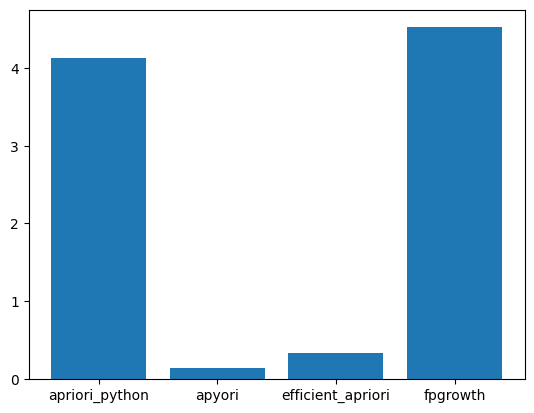

In [62]:
time = [fin_time_apriori, fin_time_apyori, fin_time_eff, fin_time_fpgrowth]

plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth'], time)
plt.show()

6.  Загрузить данные data.csv. 

In [67]:
data = pd.read_csv("data.csv")
data

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9525,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9526,Truffles,Tea,Spanish Brunch,Christmas common,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9527,Muffin,Tacos/Fajita,Coffee,Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9528,Coffee,Pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


7. Визуализировать данные (отразить на гистограммах относительную и 
фактическую  частоту  встречаемости  для  20  наиболее  популярных 
товаров).

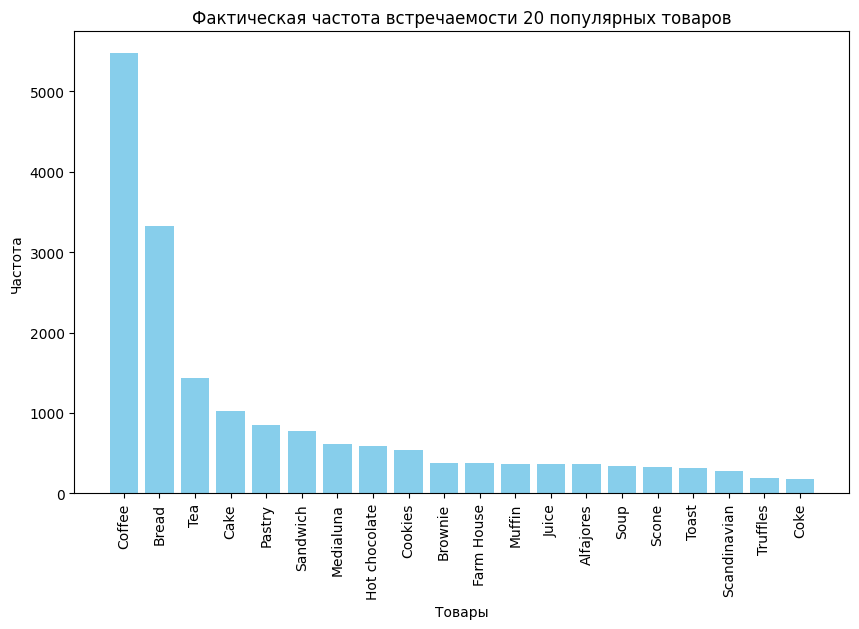

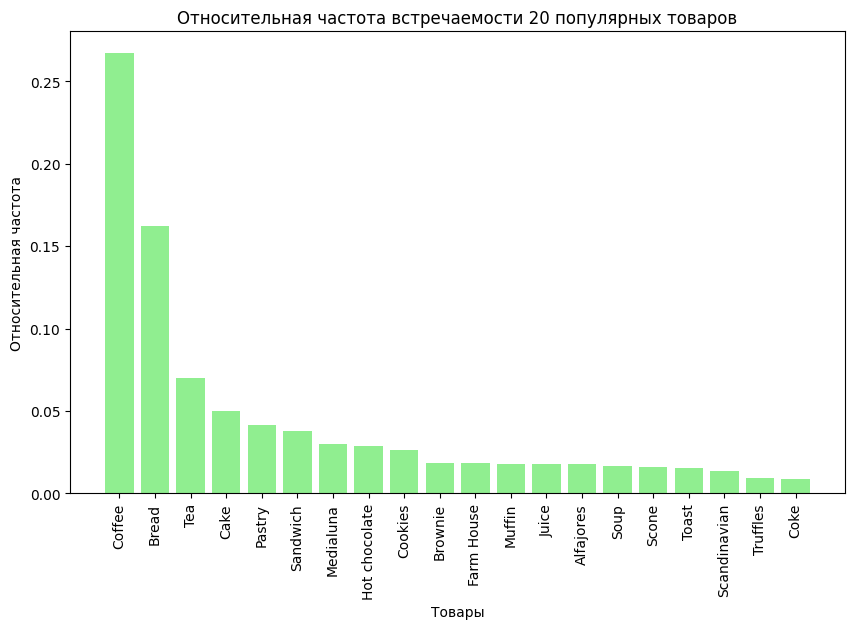

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

transactions = data.values.tolist()
all_items = [item for sublist in transactions for item in sublist if pd.notna(item)]

item_counts = Counter(all_items)

top_items = item_counts.most_common(20)

items, counts = zip(*top_items)

# Фактическая частота
plt.figure(figsize=(10, 6))
plt.bar(items, counts, color='skyblue')
plt.xticks(rotation=90)
plt.title('Фактическая частота встречаемости 20 популярных товаров')
plt.xlabel('Товары')
plt.ylabel('Частота')
plt.show()

# Относительная частота
relative_counts = [count / len(all_items) for count in counts]

plt.figure(figsize=(10, 6))
plt.bar(items, relative_counts, color='lightgreen')
plt.xticks(rotation=90)
plt.title('Относительная частота встречаемости 20 популярных товаров')
plt.xlabel('Товары')
plt.ylabel('Относительная частота')
plt.show()


8. Применить  алгоритм  Apriori,  используя  3  разные  библиотеки 
(apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для 
алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

apriori_python

In [71]:
import time
start_apriori = time.time()
transactions = data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
print(f'Кол-во транзакций: {len(transactions)}')

itemsets, rules = apriori(transactions, minSup=0.01, minConf=0.4)

for rule in sorted(rules, key=lambda x: x[2], reverse=True)[:10]:
    print(f'Правило: {rule[0]} -> {rule[1]}, Уверенность: {rule[2]}')
fin_time_apriori = time.time() - start_apriori
print(f"Время выполнения с помощью apriori_python: {fin_time_apriori} сек")

Кол-во транзакций: 9530
Правило: {'Toast'} -> {'Coffee'}, Уверенность: 0.7044025157232704
Правило: {'Spanish Brunch'} -> {'Coffee'}, Уверенность: 0.5988372093023255
Правило: {'Medialuna'} -> {'Coffee'}, Уверенность: 0.5692307692307692
Правило: {'Pastry'} -> {'Coffee'}, Уверенность: 0.5521472392638037
Правило: {'Alfajores'} -> {'Coffee'}, Уверенность: 0.5406976744186046
Правило: {'Juice'} -> {'Coffee'}, Уверенность: 0.5342465753424658
Правило: {'Sandwich'} -> {'Coffee'}, Уверенность: 0.5323529411764706
Правило: {'Cake'} -> {'Coffee'}, Уверенность: 0.5269582909460834
Правило: {'Scone'} -> {'Coffee'}, Уверенность: 0.5229357798165137
Правило: {'Cookies'} -> {'Coffee'}, Уверенность: 0.5184466019417475
Время выполнения с помощью apriori_python: 0.9164831638336182 сек


apyori

In [72]:
from apyori import apriori


start_time_apyory = time.time()
rules = apriori(transactions, min_support=0.005, min_confidence=0.3, min_lift=1, min_length=2)

results = list(rules)

for result in results[:10]:
    items_base = result.items
    items_base = set(result.items) - set(result.ordered_statistics[0].items_add)
    items_add = result.ordered_statistics[0].items_add
    confidence = result.ordered_statistics[0].confidence
    lift = result.ordered_statistics[0].lift
    print(f'Правило: {items_base} -> {items_add}, уверенность: {confidence}')

fin_time_apyori = time.time() - start_time_apyory
print(f"Время выполнения с помощью apyori: {fin_time_apyori}сек")


Правило: set() -> frozenset({'Bread'}), уверенность: 0.3248688352570829
Правило: set() -> frozenset({'Coffee'}), уверенность: 0.4751311647429171
Правило: {'Alfajores'} -> frozenset({'Coffee'}), уверенность: 0.5406976744186047
Правило: {'Jam'} -> frozenset({'Bread'}), уверенность: 0.3380281690140845
Правило: {'Pastry'} -> frozenset({'Bread'}), уверенность: 0.33865030674846625
Правило: {'Brownie'} -> frozenset({'Coffee'}), уверенность: 0.4907651715039578
Правило: {'Cake'} -> frozenset({'Coffee'}), уверенность: 0.5269582909460834
Правило: {'Cookies'} -> frozenset({'Coffee'}), уверенность: 0.5184466019417475
Правило: {'Hearty & Seasonal'} -> frozenset({'Coffee'}), уверенность: 0.54
Правило: {'Hot chocolate'} -> frozenset({'Coffee'}), уверенность: 0.5072463768115942
Время выполнения с помощью apyori: 0.01822376251220703сек


efficient_apriori

In [73]:
import pandas as pd
from efficient_apriori import apriori

start_eff=time.time()
transactions = data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

itemsets, rules = apriori(transactions, min_support=0.005, min_confidence=0.52)
for i in range(len(rules)):
    print(rules[i])

fin_time_eff = time.time() - start_eff
print(f"Время выполнения с помощью efficient_apriori: {fin_time_eff} сек")

{Alfajores} -> {Coffee} (conf: 0.541, supp: 0.020, lift: 1.138, conv: 1.143)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Hearty & Seasonal} -> {Coffee} (conf: 0.540, supp: 0.006, lift: 1.137, conv: 1.141)
{Juice} -> {Coffee} (conf: 0.534, supp: 0.020, lift: 1.124, conv: 1.127)
{Keeping It Local} -> {Coffee} (conf: 0.810, supp: 0.005, lift: 1.704, conv: 2.756)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.218)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Salad} -> {Coffee} (conf: 0.626, supp: 0.007, lift: 1.318, conv: 1.404)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)
{Scone} -> {Coffee} (conf: 0.523, supp: 0.018, lift: 1.101, conv: 1.100)
{Spanish Brunch} -> {Coffee} (conf: 0.599, supp: 0.011, lift: 1.260, conv: 1.308)
{Tiffin} -> {Coffee} (conf: 0.548, supp: 0.008, lift: 1.153, conv: 1.161)
{Toast} -> {Coffee} (conf: 0.704, supp: 0.024, lift: 1.483, conv: 1.776)
{Cake, 

9. Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать 
гиперпараметры  для  алгоритма  так,  чтобы  выводилось  порядка  10 
наилучших правил.

In [78]:
from fpgrowth_py import fpgrowth

start_time_fpgrowth = time.time()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.005, minConf=0.59)
for i in range(len(rules)):
    print(rules[i])

fin_time_fpgrowth = time.time() - start_time_fpgrowth
print(f"Время выполнения fpgrowth: {fin_time_fpgrowth} сек")

[{'Keeping It Local'}, {'Coffee'}, 0.8095238095238095]
[{'Salad'}, {'Coffee'}, 0.6262626262626263]
[{'Spanish Brunch'}, {'Coffee'}, 0.5988372093023255]
[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Juice', 'Cookies'}, {'Coffee'}, 0.603448275862069]
[{'Hot chocolate', 'Cookies'}, {'Coffee'}, 0.6140350877192983]
[{'Pastry', 'Hot chocolate'}, {'Coffee'}, 0.6666666666666666]
[{'Hot chocolate', 'Cake'}, {'Coffee'}, 0.6018518518518519]
[{'Sandwich', 'Cake'}, {'Coffee'}, 0.676923076923077]
Время выполнения fpgrowth: 0.9894318580627441 сек


10. Сравнить время выполнения всех алгоритмов и построить гистограмму. 

Время выполнения с помощью apriori_python: 0.9164831638336182 сек
Время выполнения с помощью apyori: 0.01822376251220703сек
Время выполнения с помощью efficient_apriori: 0.3528308868408203 сек
Время выполнения fpgrowth: 0.9894318580627441 сек

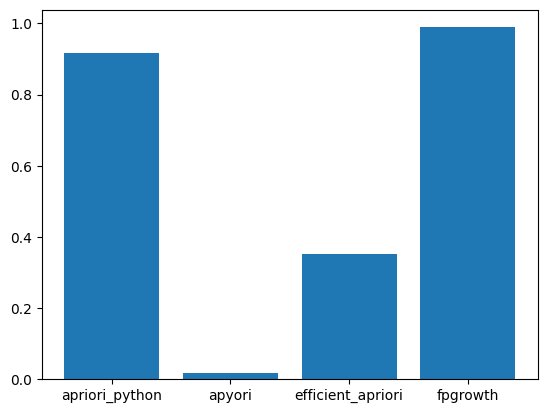

In [79]:
time = [fin_time_apriori, fin_time_apyori, fin_time_eff, fin_time_fpgrowth]

plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth'], time)
plt.show()